In [1]:
import h5py
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from plot_utils import plot_1Dhist, plot_1Dstack, display_statistics

In [2]:
# data path 
data_path = "../data/sim/"

# get all the files in the data path
filenames = os.listdir(data_path)

# filter out the files that are not .h5
filenames = [filename for filename in filenames if filename.endswith(".h5")]

# sort filenames based by the number at the end before the .root
filenames.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))

print("Number of files: ", len(filenames))
for filename in filenames:
    print(filename)

Number of files:  5
JetNtuple_RunIISummer16_13TeV_MC_1.h5
JetNtuple_RunIISummer16_13TeV_MC_2.h5
JetNtuple_RunIISummer16_13TeV_MC_3.h5
JetNtuple_RunIISummer16_13TeV_MC_4.h5
JetNtuple_RunIISummer16_13TeV_MC_5.h5


In [3]:
jet_features   = ["event", "eventJetMult", "nPF", "jetPt", "jetEta", "jetPhi", "jetMass", "jetLooseID", "jetTightID"]
pf_features    = ["PF_pT", "PF_dR", "PF_dPhi", "PF_dEta", "PF_mass"]
labels         = ["physFlav", "isPhysUDS", "isPhysG", "isPhysOther"]

features = np.concatenate((jet_features, pf_features, labels), axis=0)

In [4]:
# Create an empty dataframe
df = pd.DataFrame(columns=features)

df_list = []

# Loop through the filenames
for filename in filenames:
    print("Reading", filename)
    
    # Create the file path
    file_path = data_path + filename

    # Open the file as read-only
    h5_file = h5py.File(file_path, "r")
    
    col_list = []
    
    for key in features:

        # Get the data
        data = h5_file[key][:]
        
        # Create a dataframe
        col_df = pd.DataFrame(data, columns=[key])
        
        # Add the dataframe to the list
        col_list.append(col_df)
    
    col_df = pd.concat(col_list, axis=1)
    
    # keep only rows with both jetLooseID and jetTightID == 1
    col_df = col_df[(col_df["jetLooseID"] == 1) & (col_df["jetTightID"] == 1)]
    
    # drop the jetLooseID and jetTightID columns
    col_df = col_df.drop(columns=["jetLooseID", "jetTightID"])
    
    df_list.append(col_df)
    
    # Close the file
    h5_file.close()

df = pd.concat(df_list, axis=0)
df = df.reset_index(drop=True)

print("Number of dataframes: ", len(df_list))
print("Number of jets: ", len(df))

Reading JetNtuple_RunIISummer16_13TeV_MC_1.h5
Reading JetNtuple_RunIISummer16_13TeV_MC_2.h5
Reading JetNtuple_RunIISummer16_13TeV_MC_3.h5
Reading JetNtuple_RunIISummer16_13TeV_MC_4.h5
Reading JetNtuple_RunIISummer16_13TeV_MC_5.h5
Number of dataframes:  5
Number of jets:  673204


In [5]:
df.head()

,event,eventJetMult,nPF,jetPt,jetEta,jetPhi,jetMass,PF_pT,PF_dR,PF_dPhi,PF_dEta,PF_mass,physFlav,isPhysUDS,isPhysG,isPhysOther
0,2063618,3,109,201.199554,-0.455842,-1.927541,20.587746,"[1.8154297, 1.2822266, 3.7207031, 3.03125, 38....","[1.0493158, 0.51397204, 0.289036, 0.030307163,...","[0.6951847, -0.29761684, -0.11187923, 0.013032...","[0.78599095, 0.4190364, 0.26650488, 0.02736184...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",-2,1,0,0
1,2063618,3,121,154.892838,0.014880,1.769757,18.438292,"[1.9453125, 0.9526367, 3.1035156, 3.0683594, 1...","[0.9836387, 0.7918921, 1.0256819, 0.24366628, ...","[0.112228975, 0.3550055, 0.89584845, 0.0856738...","[0.9772153, 0.7078589, 0.49947852, 0.22810796,...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",0,0,0,1
2,2063618,3,90,105.403564,-2.155736,0.339309,17.063622,"[2.9941406, 3.203125, 2.6601562, 2.203125, 2.0...","[1.1852846, 1.365216, 1.138679, 1.0703336, 0.3...","[-0.6771155, -0.9583678, -0.8486959, -0.786974...","[0.9728383, 0.97228897, 0.75914764, 0.7254553,...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",0,0,0,1
3,2063617,4,57,1263.015747,0.024581,-1.778938,65.909691,"[3.6347656, 3.7597656, 1.0693359, 2.0117188, 3...","[0.40648416, 0.14637692, 0.53210837, 0.2892923...","[0.27157003, 0.09177413, -0.52239317, -0.28264...","[0.3024551, 0.11403382, 0.10121605, 0.06166405...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",-1,1,0,0
4,2063617,4,143,742.551147,-0.602228,1.542989,67.713173,"[4.9960938, 4.5859375, 1.2675781, 3.703125, 2....","[1.3341329, 1.2511897, 0.8115758, 0.18390264, ...","[0.9092321, 0.8337412, 0.4774905, -0.064333454...","[0.9763235, 0.9329262, 0.6562454, 0.17228287, ...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",0,0,0,1


In [6]:
# return the unique values of physFlav with counts
df["physFlav"].value_counts()

 0     327328
 21    206497
 2      61361
 1      32868
-1       9728
-2       8267
-3       5737
 3       5602
 4       4756
-4       4709
-5       3180
 5       3171
Name: physFlav, dtype: int64

## Flavors

- 0 = ?
- 1 = down
- 2 = up
- 3 = strange
- 4 = charm
- 5 = bottom
- 21 = gluon

In [7]:
flav_dict = {
    0:  "other",
    1:  "d",
    -1: "d",
    2:  "u",
    -2: "u",
    3:  "s",
    -3: "s",
    4:  "c",
    -4: "c",
    5:  "b",
    -5: "b",
    21: "g",
}

df["label"] = df["physFlav"].map(flav_dict)

df.head()

,event,eventJetMult,nPF,jetPt,jetEta,jetPhi,jetMass,PF_pT,PF_dR,PF_dPhi,PF_dEta,PF_mass,physFlav,isPhysUDS,isPhysG,isPhysOther,label
0,2063618,3,109,201.199554,-0.455842,-1.927541,20.587746,"[1.8154297, 1.2822266, 3.7207031, 3.03125, 38....","[1.0493158, 0.51397204, 0.289036, 0.030307163,...","[0.6951847, -0.29761684, -0.11187923, 0.013032...","[0.78599095, 0.4190364, 0.26650488, 0.02736184...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",-2,1,0,0,u
1,2063618,3,121,154.892838,0.014880,1.769757,18.438292,"[1.9453125, 0.9526367, 3.1035156, 3.0683594, 1...","[0.9836387, 0.7918921, 1.0256819, 0.24366628, ...","[0.112228975, 0.3550055, 0.89584845, 0.0856738...","[0.9772153, 0.7078589, 0.49947852, 0.22810796,...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",0,0,0,1,other
2,2063618,3,90,105.403564,-2.155736,0.339309,17.063622,"[2.9941406, 3.203125, 2.6601562, 2.203125, 2.0...","[1.1852846, 1.365216, 1.138679, 1.0703336, 0.3...","[-0.6771155, -0.9583678, -0.8486959, -0.786974...","[0.9728383, 0.97228897, 0.75914764, 0.7254553,...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",0,0,0,1,other
3,2063617,4,57,1263.015747,0.024581,-1.778938,65.909691,"[3.6347656, 3.7597656, 1.0693359, 2.0117188, 3...","[0.40648416, 0.14637692, 0.53210837, 0.2892923...","[0.27157003, 0.09177413, -0.52239317, -0.28264...","[0.3024551, 0.11403382, 0.10121605, 0.06166405...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",-1,1,0,0,d
4,2063617,4,143,742.551147,-0.602228,1.542989,67.713173,"[4.9960938, 4.5859375, 1.2675781, 3.703125, 2....","[1.3341329, 1.2511897, 0.8115758, 0.18390264, ...","[0.9092321, 0.8337412, 0.4774905, -0.064333454...","[0.9763235, 0.9329262, 0.6562454, 0.17228287, ...","[0.13952637, 0.13952637, 0.13952637, 0.1395263...",0,0,0,1,other


In [8]:
#drop rows with physFlav == 0
df_clean = df[df["physFlav"] != 0]

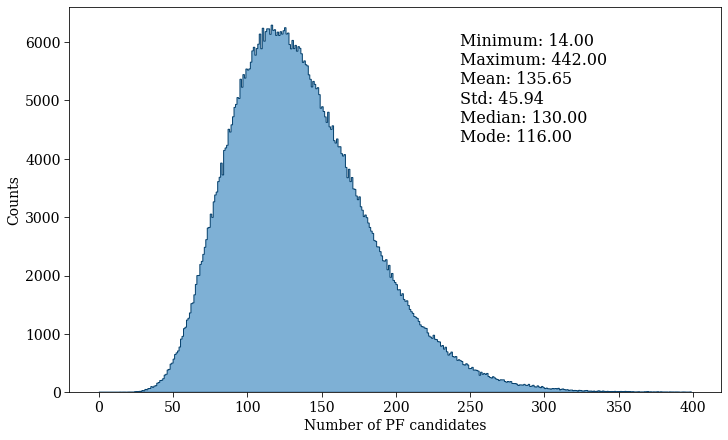

In [51]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

ax = plot_1Dhist(fig, df["nPF"], bins=np.arange(0, 400, 1), legend=False, xlab="Number of PF candidates", ylab="Counts", title="")

ax = display_statistics(df["nPF"], ax, x=0.6, y=0.9)

plt.show()

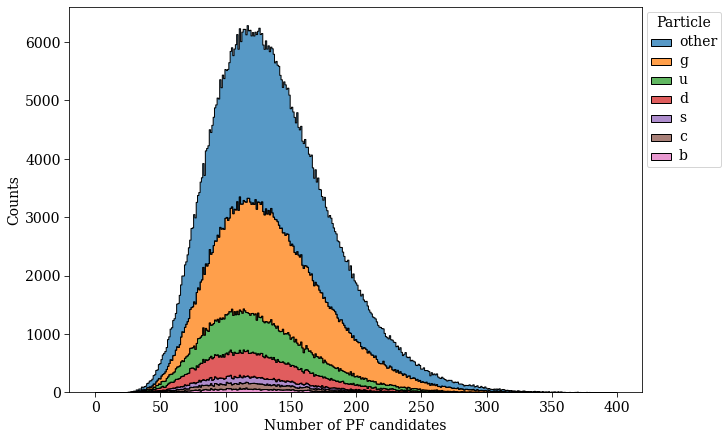

In [52]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

ax = plot_1Dstack(fig, df["nPF"], df["label"], bins=np.arange(0, 400, 1), legend=True, xlab="Number of PF candidates", ylab="Counts", title="")

plt.show()

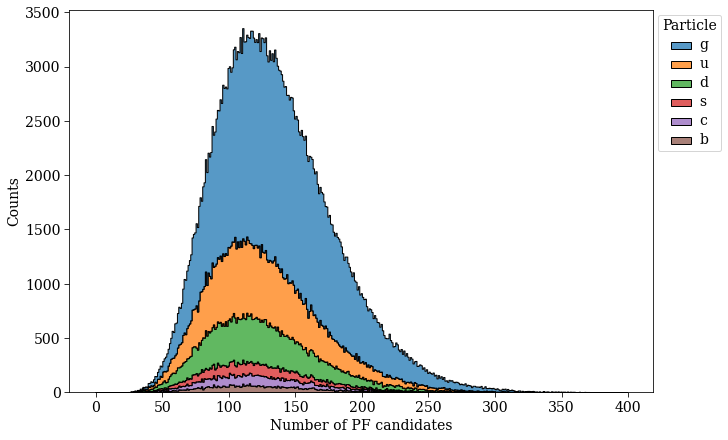

In [53]:


fig = plt.figure(figsize=(10, 6), constrained_layout=True)

ax = plot_1Dstack(fig, df_clean["nPF"], df_clean["label"], bins=np.arange(0, 400, 1), legend=True, xlab="Number of PF candidates", ylab="Counts", title="")

plt.show()

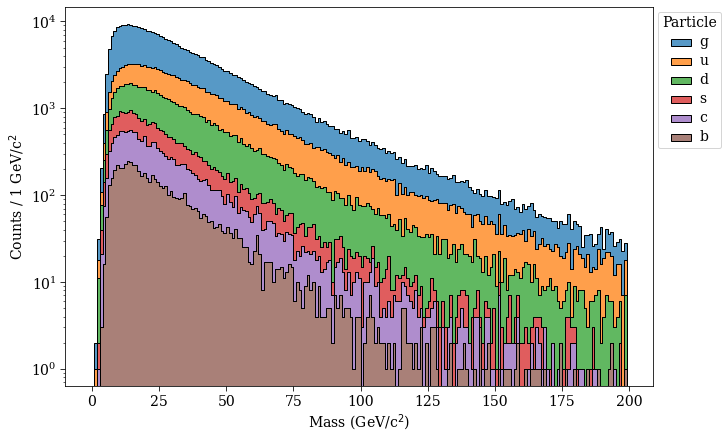

In [63]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

step = 1
bins = np.arange(0, 200, step)

ax = plot_1Dstack(fig, df_clean["jetMass"], df_clean["label"], bins=bins, legend=True, xlab="Mass (GeV/c$^2$)", ylab=f"Counts / {step} GeV/c$^2$", title="")
ax.set_yscale("log")

plt.show()

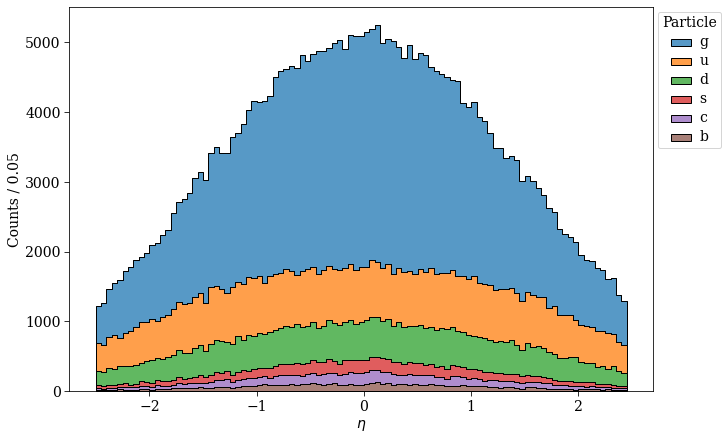

In [23]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

step = 0.05
bins = np.arange(-2.5, 2.5, step)

ax = plot_1Dstack(fig, df_clean["jetEta"], df_clean["label"], bins=bins, legend=True, xlab="$\eta$", ylab=f"Counts / {step}", title="")
# ax.set_yscale("log")

plt.show()

## PCA

In [48]:
from sklearn.decomposition import PCA

def perform_pca(df):
    # Select the columns to perform PCA on
    X = df[["jetPt", "jetMass", "jetEta"]].values

    # Initialize the PCA model with final dimension 2
    pca = PCA(n_components=2)

    return pca.fit_transform(X)


X_pca = perform_pca(df_clean)


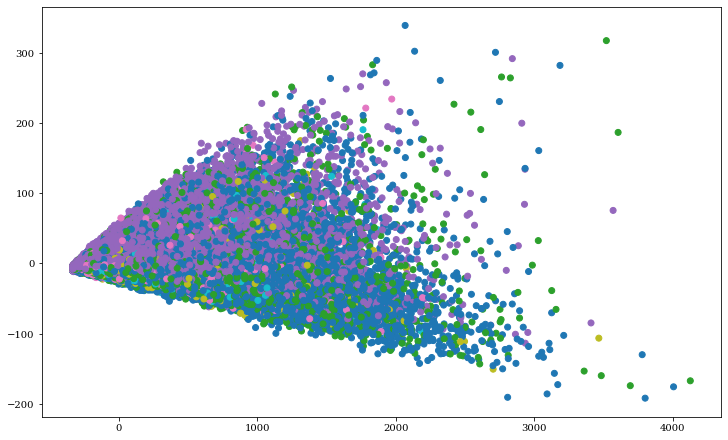

In [45]:
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_clean["label"])[0], cmap="tab10")

plt.show()

## Particles

In [29]:
labels = df_clean["label"].to_numpy()

# convert labels to integers
labels = pd.factorize(labels)[0]

pt = df_clean["PF_pT"].to_numpy()

In [30]:
pt_flattened = np.concatenate(pt)
labels_repeated = np.repeat(labels, [len(x) for x in pt])
par_array = np.column_stack((pt_flattened, labels_repeated))

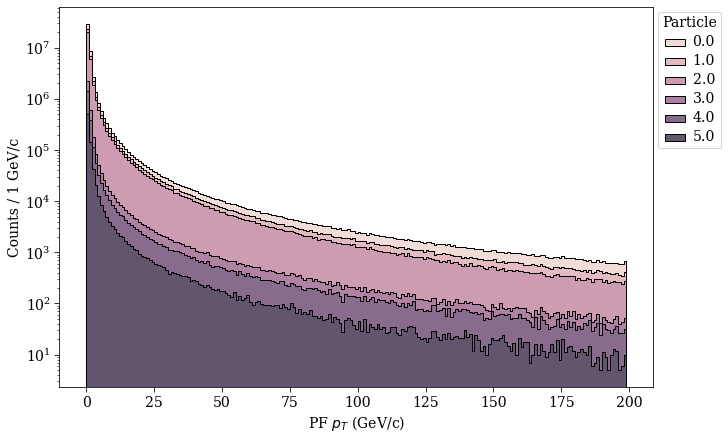

In [33]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

step = 1
bins = np.arange(0, 200, step)

ax = plot_1Dstack(fig, par_array[:, 0], par_array[:, 1], bins=bins, legend=True, xlab="PF $p_T$ (GeV/c)", ylab=f"Counts / {step} GeV/c", title="")
ax.set_yscale("log")

plt.show()